## QUASAR & HDS

################# QUASAR #################
Initializing Sobol vectors.

Evolving population:
 Gen. 1/5 | f(x)=1.92e+03 | stdev=5.44e+03 | reinit=1.00
 Gen. 2/5 | f(x)=4.24e+02 | stdev=2.34e+03 | reinit=0.51
 Gen. 3/5 | f(x)=1.79e+02 | stdev=2.31e+03 | reinit=0.26
 Gen. 4/5 | f(x)=1.00e+02 | stdev=1.00e+03 | reinit=0.13
 Gen. 5/5 | f(x)=8.13e+01 | stdev=8.38e+02 | reinit=0.07
Polishing solution.

Results:
- f(x): 3.78e+01
- Solution: [4.97e+00, 2.98e+00, -1.99e+00]
- Elapsed: 0.049s



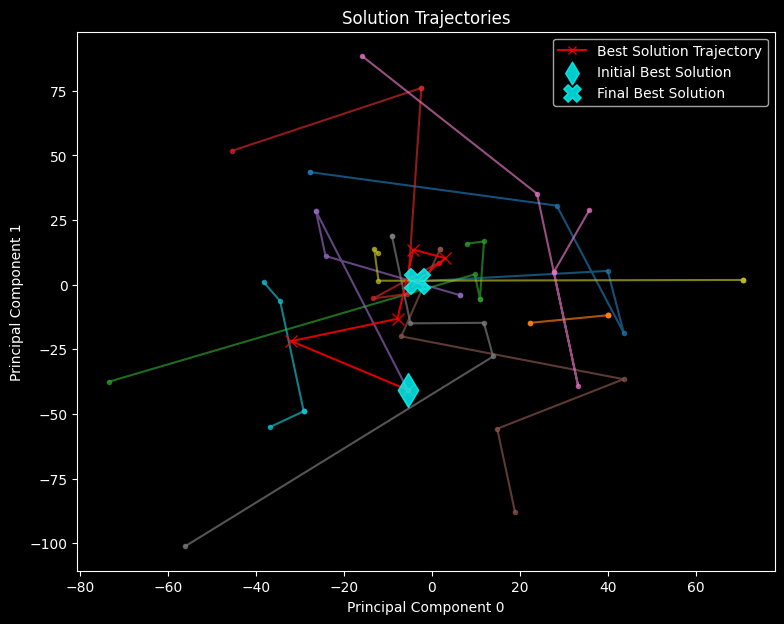


################# HDS #################
Calculating ellipsoid density.
Orienting axes.

results:
    - number of samples: 10000
    - sample generation time: 0.93
    - number of hyperellipsoids: 3
    - number of initial QMC: 1024
    - number of initial clusters: 100
    - gaussian weights: {0: {'center': 50, 'std': 50}, 1: {'center': 50, 'std': 50}, 2: {'center': 50, 'std': 50}}

stats:
    - mean HDS: 14.34
    - mean comparison QMC: 0.00
    - stdev HDS: 49.14
    - stdev comparison QMC: 57.73



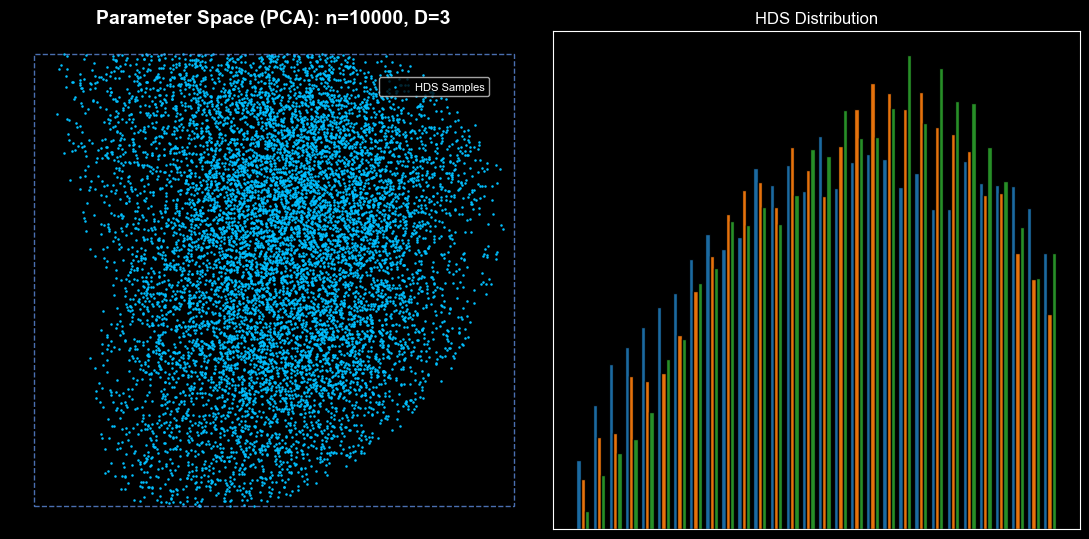

In [1]:
import hdim_opt

# optimization parameters
n_dim = 3 # num dimensions
bounds = [(-100,100)] * n_dim # search bounds
func = hdim_opt.quasar_optimization.rastrigin # function to minimize (module has 3 built in test functions)



################# QUASAR #################
print('################# QUASAR #################')
solution, fitness = hdim_opt.quasar(func, bounds, maxiter=5) # run QUASAR optimization (verbose true by default)


################# HDS #################
print('\n################# HDS #################')

# optional gaussian weights
hds_weights = {
    0: {'center': 50, 'std': 50}, # 1st dimension
    1: {'center': 50, 'std': 50}, # 2nd dimension
    2: {'center': 50, 'std': 50} # 3rd dimension
    }
hds_samples = hdim_opt.hds(n_samples=10000, bounds=bounds, weights=hds_weights, verbose=True) # generate HDS sample sequence



################# COMBINED #################

y = hdim_opt.quasar(func, bounds, maxiter=5, init='hds', verbose=False) # use internal generation
y = hdim_opt.quasar(func, bounds, maxiter=5, init=hds_samples, verbose=False) # or can use a pre-generated sample matrix

In [ ]:
## Sobol & Sensitivity

Generating 1,024 Sobol samples for sensitivity analysis.
Running sensitivity analysis.


/opt/anaconda3/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


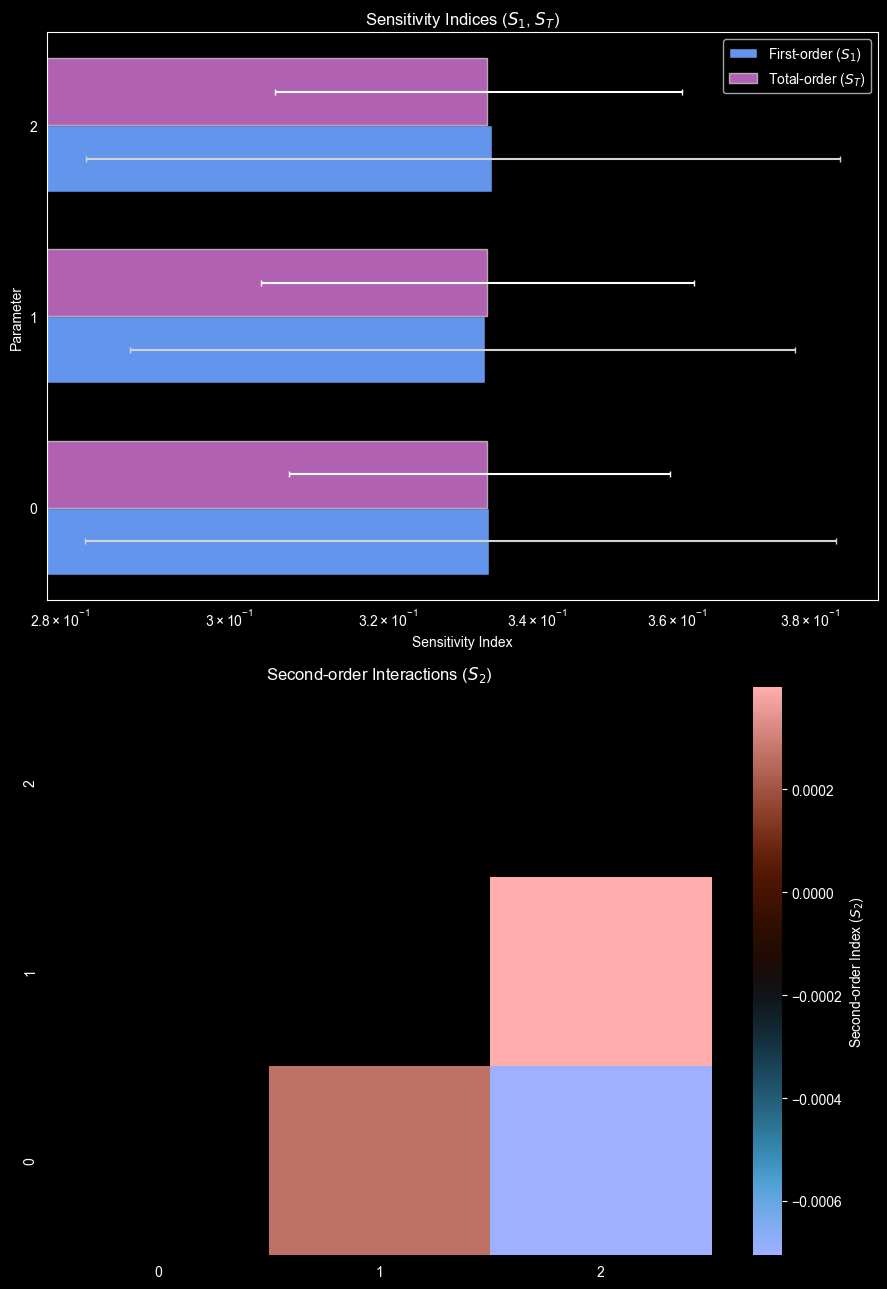

In [7]:
# SENSITIVITY ANALYSIS
Si, S2 = hdim_opt.sensitivity(func, bounds)

# SOBOL SAMPLES
sobol_samples = hdim_opt.sobol(n_samples, bounds)